In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

base_dir = "data/Data_Brain/Train"

classes = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

colors = {
    "Glioma": (255, 0, 0),
    "Meningioma": (0, 255, 0),
    "No Tumor": (0, 0, 255),
    "Pituitary": (255, 255, 0)
}



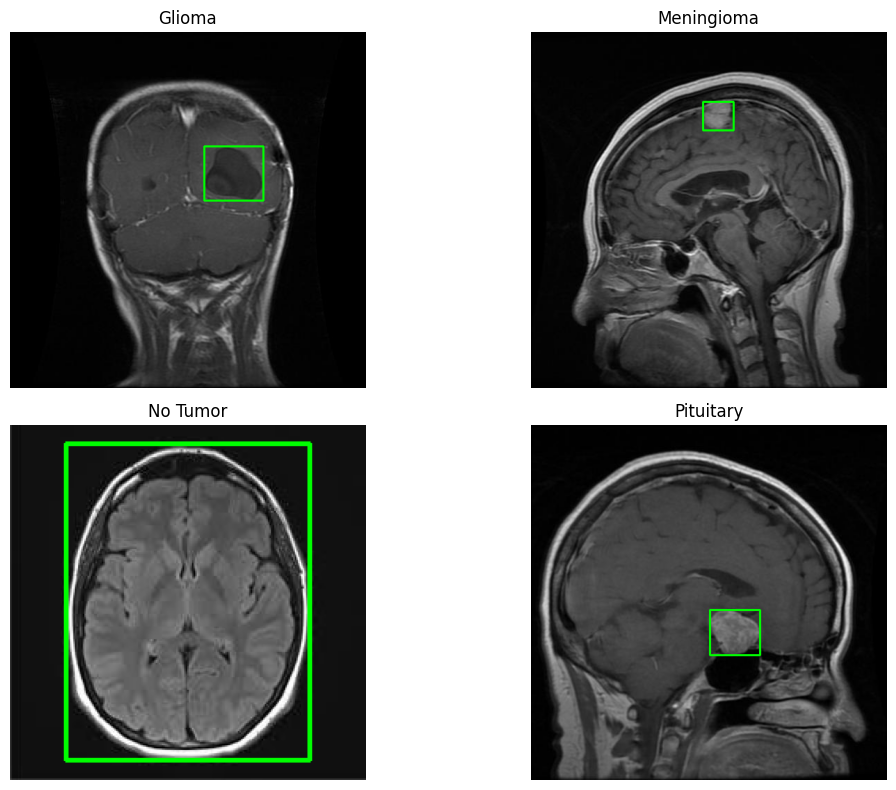

In [ ]:

def draw_yolo_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 5:
                continue
            cls_id, x_center, y_center, bw, bh = map(float, parts)
            cls_id = int(cls_id)

            x_center, y_center, bw, bh = x_center * w, y_center * h, bw * w, bh * h
            x1 = int(x_center - bw / 2)
            y1 = int(y_center - bh / 2)
            x2 = int(x_center + bw / 2)
            y2 = int(y_center + bh / 2)

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image

plt.figure(figsize=(12, 8))
for i, cls in enumerate(classes):
    img_dir = os.path.join(base_dir, cls, "images")
    label_dir = os.path.join(base_dir, cls, "labels")

    images = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
    if not images:
        continue
    img_file = random.choice(images)

    img_path = os.path.join(img_dir, img_file)
    label_path = os.path.join(label_dir, os.path.splitext(img_file)[0] + ".txt")

    if os.path.exists(label_path):
        img = draw_yolo_boxes(img_path, label_path)
    else:
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
images

['p (1).jpg',
 'p (10).jpg',
 'p (100).jpg',
 'p (101).jpg',
 'p (102).jpg',
 'p (103).jpg',
 'p (104).jpg',
 'p (105).jpg',
 'p (106).jpg',
 'p (107).jpg',
 'p (108).jpg',
 'p (109).jpg',
 'p (11).jpg',
 'p (110).jpg',
 'p (111).jpg',
 'p (112).jpg',
 'p (113).jpg',
 'p (114).jpg',
 'p (115).jpg',
 'p (116).jpg',
 'p (117).jpg',
 'p (118).jpg',
 'p (119).jpg',
 'p (12).jpg',
 'p (120).jpg',
 'p (121).jpg',
 'p (122).jpg',
 'p (123).jpg',
 'p (124).jpg',
 'p (125).jpg',
 'p (126).jpg',
 'p (127).jpg',
 'p (128).jpg',
 'p (129).jpg',
 'p (13).jpg',
 'p (130).jpg',
 'p (131).jpg',
 'p (132).jpg',
 'p (133).jpg',
 'p (134).jpg',
 'p (135).jpg',
 'p (136).jpg',
 'p (137).jpg',
 'p (138).jpg',
 'p (14).jpg',
 'p (140).jpg',
 'p (141).jpg',
 'p (142).jpg',
 'p (143).jpg',
 'p (144).jpg',
 'p (145).jpg',
 'p (146).jpg',
 'p (147).jpg',
 'p (148).jpg',
 'p (149).jpg',
 'p (15).jpg',
 'p (150).jpg',
 'p (151).jpg',
 'p (152).jpg',
 'p (153).jpg',
 'p (154).jpg',
 'p (155).jpg',
 'p (156).jpg',
